# Reducción de Dimensionalidad y Benchmarking de Modelos (Core) / Elida Peña

**Descripción:**

En este proyecto, aplicarás una combinación de técnicas avanzadas, comenzando por un análisis de reducción de dimensionalidad (como PCA) y luego realizarás un benchmark de diferentes modelos de machine learning para encontrar el que mejor se adecue a los objetivos específicos del dataset que has elegido.



**Objetivo:**

El objetivo es realizar un análisis exhaustivo que comience con la reducción de dimensionalidad para simplificar el dataset y luego probar varios modelos de machine learning para determinar cuál ofrece el mejor rendimiento en términos de precisión, recall, F1-score u otras métricas relevantes para tu problema.



**Instrucciones:**

1. Selección del dataset:
  – Utiliza el dataset que seleccionaste para el Proyecto 2 o elige uno adecuado de Kaggle que se relacione con tu área de interés. El dataset debe tener al menos 10 características y una variable objetivo clara.
  – Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.

2. Reducción de dimensionalidad:
  – Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.
  – Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.
  – Utiliza las características reducidas para simplificar el conjunto de datos.

3. Benchmarking de modelos:
  – Implementa y compara al menos tres modelos de machine learning en el dataset reducido. Algunos ejemplos de modelos que puedes utilizar incluyen:
    – Regresión logística
    – Árboles de decisión
    – Random Forest
    – Support Vector Machines (SVM)
  – Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.

4. Análisis comparativo de modelos:
  – Compara los modelos en base a las métricas obtenidas. Discute cuál de los modelos es más adecuado para resolver el problema en cuestión y por qué.
  – Si alguno de los modelos tiene un rendimiento significativamente inferior, analiza posibles causas y estrategias para mejorar el rendimiento (como ajustar hiperparámetros o utilizar técnicas de regularización).

5. Informe final:
  – Elabora un informe detallado que incluya:
    – El análisis de reducción de dimensionalidad, mostrando cómo PCA (u otra técnica) ayudó a reducir el número de características sin perder información relevante.
    – Un análisis comparativo de los modelos probados, con gráficos que muestren el rendimiento de cada modelo.
    – Conclusiones y recomendaciones sobre cuál modelo utilizarías en un escenario real.

In [1]:
# Paso 1: Importación de librerías y carga del dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Cargar el dataset
ruta_dataset = "../data/data.csv"  # Ajusta la ruta si el archivo está en otro directorio
df = pd.read_csv(ruta_dataset)

# Mostrar las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico
print("\nResumen estadístico:")
print(df.describe())

# Verificar valores nulos
print("\n¿Existen valores nulos?")
print(df.isnull().sum())


Primeras filas del dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_w

In [3]:
print(df.dtypes)


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

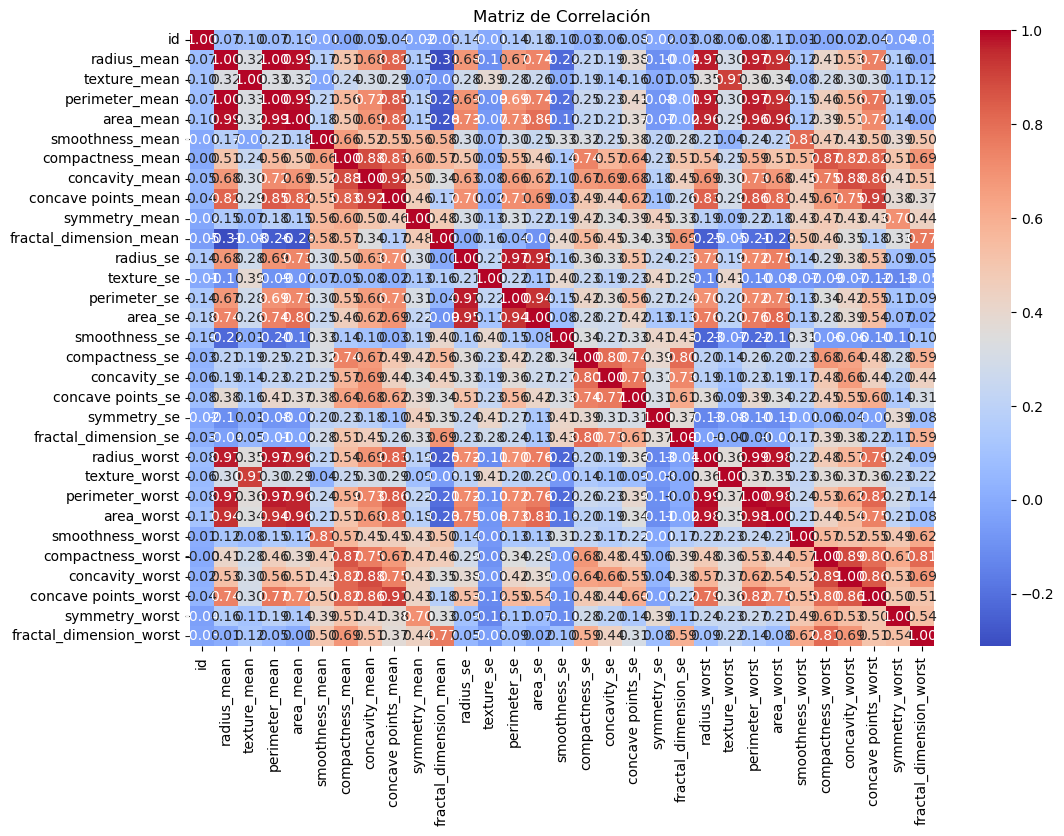

In [5]:
# Eliminar columnas innecesarias
df = df.drop(columns=['Unnamed: 32'], errors='ignore')

# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Varianza explicada por cada componente:
[0.42864701 0.18376792 0.09146436 0.06391475 0.05318759 0.03982815
 0.0315572  0.02166945]

Número de componentes seleccionados: 8


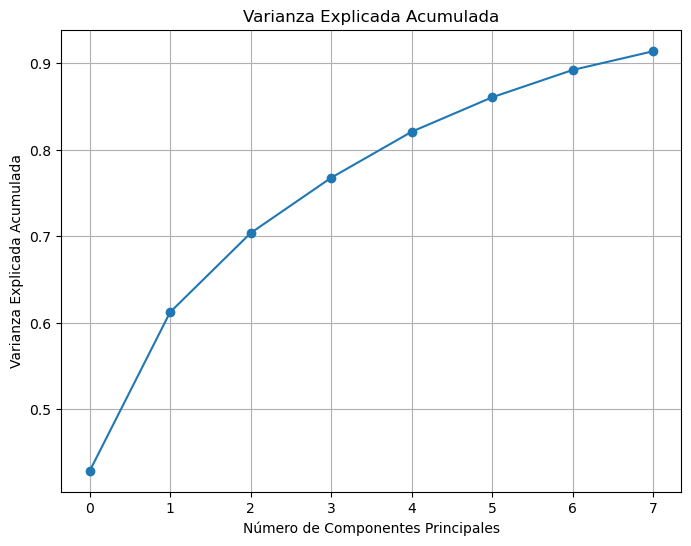

In [7]:
# Paso 2: Exploración y reducción de dimensionalidad
# Separar características (X) y etiquetas (y)
X = df.drop(columns=['diagnosis'])  # Reemplaza 'diagnosis' como objetivo
y = df['diagnosis']  # Etiqueta
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.9)  # Mantener el 90% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Explicar la varianza retenida
explained_variance = pca.explained_variance_ratio_
print("\nVarianza explicada por cada componente:")
print(explained_variance)

# Número de componentes principales
print(f"\nNúmero de componentes seleccionados: {pca.n_components_}")

# Visualización de la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title("Varianza Explicada Acumulada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.grid()
plt.show()


In [8]:
# Paso 3: Benchmarking de Modelos
# Definir validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelos a probar
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Métricas a calcular
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluar cada modelo
resultados = {}
for nombre, modelo in modelos.items():
    print(f"\nEvaluando modelo: {nombre}")
    resultados[nombre] = {}
    for metric in scoring:
        scores = cross_val_score(modelo, X_pca, y, cv=cv, scoring=metric)
        resultados[nombre][metric] = np.mean(scores)
        print(f"{metric.capitalize()}: {resultados[nombre][metric]:.4f}")



Evaluando modelo: Regresión Logística
Accuracy: 0.9667
Precision: nan
Recall: nan
F1: nan


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\utils\_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['B' 'M']

  warnings.warn(
c:\Users\59598\miniconda3\envs\mitic_dojo\l

Roc_auc: 0.9930

Evaluando modelo: Árbol de Decisión
Accuracy: 0.9385
Precision: nan
Recall: nan
F1: nan
Roc_auc: 0.9348

Evaluando modelo: Random Forest


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\utils\_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['B' 'M']

  warnings.warn(
c:\Users\59598\miniconda3\envs\mitic_dojo\l

Accuracy: 0.9526


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\utils\_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['B' 'M']

  warnings.warn(
c:\Users\59598\miniconda3\envs\mitic_dojo\l

Precision: nan


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\utils\_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['B' 'M']

  warnings.warn(
c:\Users\59598\miniconda3\envs\mitic_dojo\l

Recall: nan


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\utils\_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['B' 'M']

  warnings.warn(
c:\Users\59598\miniconda3\envs\mitic_dojo\l

F1: nan
Roc_auc: 0.9890



Comparación de Modelos:
                     accuracy  precision  recall  f1   roc_auc
Regresión Logística  0.966651        NaN     NaN NaN  0.992959
Árbol de Decisión    0.938503        NaN     NaN NaN  0.934810
Random Forest        0.952585        NaN     NaN NaN  0.989025


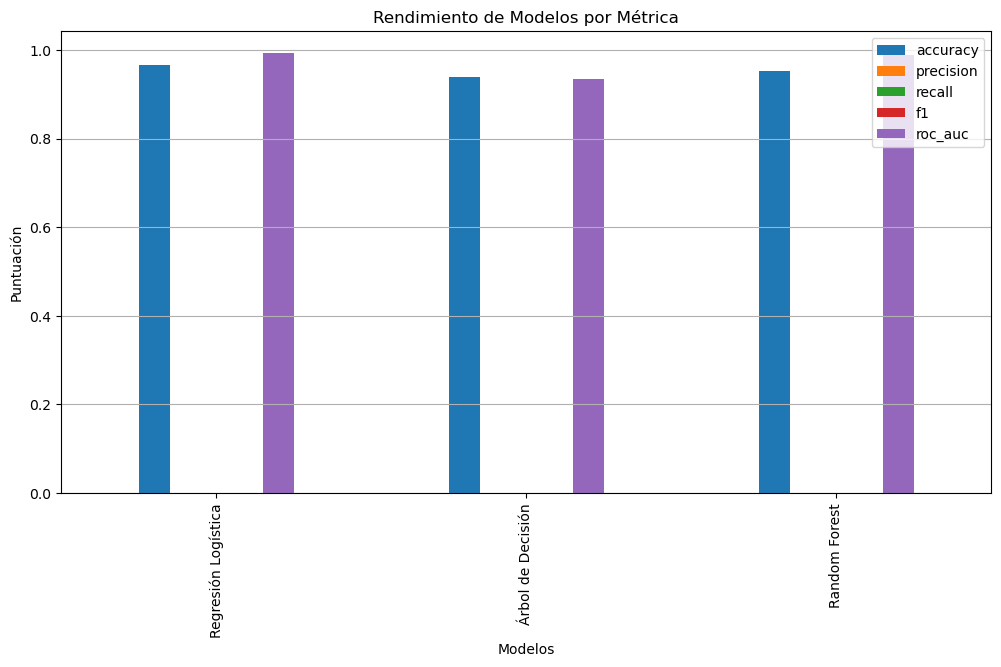

In [9]:
# Paso 4: Análisis comparativo
# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados).T

# Mostrar resultados en consola
print("\nComparación de Modelos:")
print(resultados_df)

# Visualización gráfica de las métricas
resultados_df.plot(kind='bar', figsize=(12, 6))
plt.title("Rendimiento de Modelos por Métrica")
plt.ylabel("Puntuación")
plt.xlabel("Modelos")
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()
